## Bollywood Data Clustering Project using python

Clustering is very much important as it determines the intrinsic grouping among the unlabeled data present. There are no criteria for a good clustering. It depends on the user, what is the criteria they may use which satisfy their need. For instance, we could be interested in finding representatives for homogeneous groups (data reduction), in finding “natural clusters” and describe their unknown properties (“natural” data types), in finding useful and suitable groupings (“useful” data classes) or in finding unusual data objects (outlier detection). This algorithm must make some assumptions which constitute the similarity of points and each assumption make different and equally valid clusters.

The dataset is available at wiley india store at the below link:

https://www.wileyindia.com/machine-learning-using-python.html



In [42]:
 # Import all these libraries we need to work with
import pandas as pd
import sklearn
import seaborn as sb
import matplotlib.pyplot as plt
%matplotlib inline

Let's get a peek of Bollywood movies  the dataset

In [43]:
# read data from excel file
df = pd.read_excel(r'E:\business analytics\DATA FILES 27-07-2017\Chapter 14 Data\Bollywood-Clustering.xlsx')
df.head()

,Movie_Name,Box_Office_Collection,Profit,Earning_Ratio,Budget,Youtube_Views,Youtube_Likes,Youtube_Dislikes
0,Hate Story 2,27,15,2.30,12,13798789,15708,5226
1,Alone,25,7,1.39,18,8788913,18907,2940
2,Zid,14,-6,0.70,20,6698987,6750,2234
3,NH10,32,19,2.47,13,5592977,15464,1513
4,Happy Ending,22,-27,0.45,48,5192338,6928,1120


In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Movie_Name             149 non-null    object 
 1   Box_Office_Collection  149 non-null    int64  
 2   Profit                 149 non-null    int64  
 3   Earning_Ratio          149 non-null    float64
 4   Budget                 149 non-null    int64  
 5   Youtube_Views          149 non-null    int64  
 6   Youtube_Likes          149 non-null    int64  
 7   Youtube_Dislikes       149 non-null    int64  
dtypes: float64(1), int64(6), object(1)
memory usage: 9.4+ KB


In [45]:
# Convert feature colulmn names to lower case letters
df.columns = df.columns.map(str.lower)

We have a total of 149 entries for bollywood movies alongwith their KPI's. Profit and collection is expressed in crores.

K-Means Clustering


Let’s suppose that a retail distributer has an online system where local
agents enter trading information manually. One of the fields they have
to fill in is City. But because this data entry process is manual, people
normally tend to make lots of spelling errors. For example, instead of
Delhi, people enter Dehi, Dehli, Delly, and so on. You can try to solve
this problem using clustering because the number of clusters are already
known; in other words, the retailer is aware of how many cities the agents
operate in. This is an example of K-means clustering.

Before creating clusters it is important to bring all the features under same scale of measurement. Hence, all features nedd to be normalised or standardised (Z scores).

Remember not to keep the response variable or dependent variable in the dataset,as we are only interested with the features

In [46]:
# drop movie names and convert all variables to standardised scale
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

scaled_df = scaler.fit_transform(df[['box_office_collection', 'profit', 'earning_ratio',
       'budget', 'youtube_views', 'youtube_likes', 'youtube_dislikes']])

A Dendogram is cluster tree diagram which groups those entities together that are nearer to each other. It can be drawn using seaborn, as in the below graph

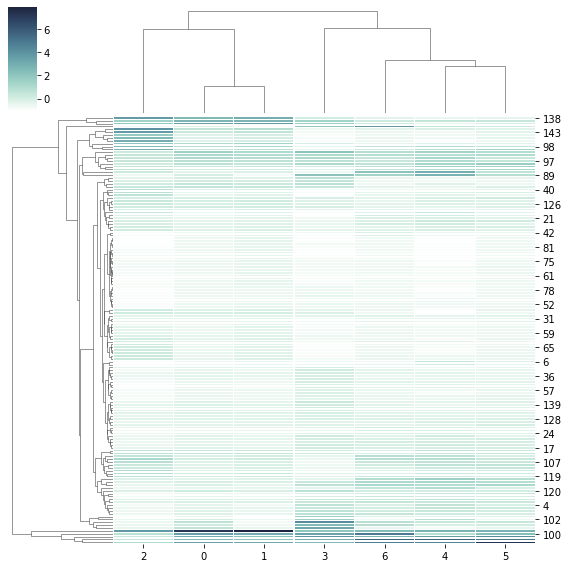

In [47]:
cmap = sb.cubehelix_palette(as_cmap=True,rot =-.3,light =1)

sb.clustermap(scaled_df,cmap =cmap,linewidth =.2, figsize=(8,8))

The tree on the left dendogram represents the relative distance of nodes. For clarification movie number 100 and 102 seems to be very closer, as they are placed near each other.
Conversly movie 100 and 138 are extremely dissimilar as the distance between both are very high.

Let' find out why movies 4 and 102 are veru much similar. We will look at their feature values for this task

In [48]:
df.iloc[[4,102]]

,movie_name,box_office_collection,profit,earning_ratio,budget,youtube_views,youtube_likes,youtube_dislikes
4,Happy Ending,22,-27,0.45,48,5192338,6928,1120
102,Humshakals,64,-11,0.85,75,6280868,1,1


The above features tell us that both the movies have negative profit, and their respective earning ratio is very close alongwith close number of you tube views .Now we should see relation between movies 138, and 143

In [49]:

df.iloc[[138,143]]

,movie_name,box_office_collection,profit,earning_ratio,budget,youtube_views,youtube_likes,youtube_dislikes
138,Grand Masti,298,263,8.51,35,1795640,3015,721
143,The Lunchbox,85,75,8.50,10,1064854,4054,285


Both the movies has similar or close earning_ratio,youtube_likes,youtube_views

Finding optimal number of clusters using Elbow curve method .This method would help us in determining the optimal number of K's we need before running the  Kmeans algorithm. The inertia_ parameterin Kmeans algorithm  provides the total variance for a particular number of clusters.

Text(0.5, 0, " Number of K's")

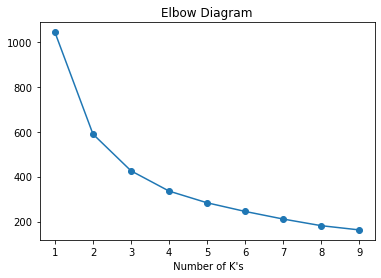

In [50]:
from sklearn.cluster import KMeans 

cluster_range = range( 1, 10 )
cluster_errors = []

for num_clusters in cluster_range:
    clusters = KMeans(num_clusters)
    clusters.fit( scaled_df )
    cluster_errors.append(clusters.inertia_)
    
plt.figure(figsize=(6,4))
plt.plot( cluster_range, cluster_errors, marker = "o" );
plt.title( "Elbow Diagram")
plt.xlabel(' Number of K\'s')

The curve indiccates elbow curve is at point 2,which in turn indicates there might be 2 clusters existing in the dataset. Elbow point is aka the point at which the curve starts to bend, and in  our case the line starts to bend at point  at 2 .So the  number of optimal K's is 2.

In [51]:
k= 3
clusters= KMeans(k,random_state =50)

clusters.fit(scaled_df)
df['clusterid'] =clusters.labels_

Cluster centers and interpreting the clusters

In [52]:
df.groupby('clusterid')['box_office_collection', 'profit', 'earning_ratio',
                        'budget', 'youtube_views', 'youtube_likes',
                        'youtube_dislikes'].agg(['mean','std']).reset_index()

D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


clusterid box_office_collection                  profit              \
                             mean         std        mean         std   
0         0            104.305556   84.075075   63.555556   78.371075   
1         1            427.000000  175.355353  314.000000  191.727671   
2         2             22.333333   22.868580    0.453704   16.193563   

  earning_ratio                budget            youtube_views                \
           mean       std        mean        std          mean           std   
0      3.510278  2.392035   40.750000  32.553582  5.599548e+06  2.937511e+06   
1      4.104000  2.593353  113.000000  21.389250  1.554258e+07  6.304946e+06   
2      1.079907  0.887688   21.805556  17.636230  2.019013e+06  1.496942e+06   

  youtube_likes               youtube_dislikes               
           mean           std             mean          std  
0  13484.805556   7108.966498      2157.222222  1514.244123  
1  63300.400000  25318.214112      8839.800000  2705.424126  
2   3442.574074   3212.739758       538.018519   496.139489

Cluster 2 mostly contains movies that have mean boxoffice collection of 22 with appx.same variation. This cluster has the lowes earing ratio movies.

Dataframe for movies that belong to cluster id 0

In [53]:
c_0= df[df['clusterid']==0]
c_0.sample(5)

,movie_name,box_office_collection,profit,earning_ratio,budget,youtube_views,youtube_likes,youtube_dislikes,clusterid
109,Besharam,35,-50,0.41,85,5319606,10253,8165,0
117,ABCD – Any Body Can Dance,44,32,3.67,12,4042091,10609,788,0
143,The Lunchbox,85,75,8.50,10,1064854,4054,285,0
107,Khoobsurat,39,27,3.28,12,5454349,12548,2038,0
108,Ragini MMS 2,50,32,2.78,18,5416213,6807,2717,0


Dataframe for movies that belong to cluster id 1

In [54]:
c_1= df[df['clusterid']==1]
c_1.sample(5)

,movie_name,box_office_collection,profit,earning_ratio,budget,youtube_views,youtube_likes,youtube_dislikes,clusterid
86,Krrish 3,300,185,2.61,115,23171067,72070,11888,1
100,Happy New Year,383,258,3.06,125,6395202,37585,10269,1
88,Bang Bang,340,200,2.43,140,15889811,61805,6283,1
90,PK,735,650,8.65,85,13270623,43767,5693,1
87,Kick,377,277,3.77,100,18986221,101275,10066,1


Dataframe for movies that belong to cluster id 2

In [55]:
c_2 = df[df['clusterid']==2]
c_2.sample(5)

,movie_name,box_office_collection,profit,earning_ratio,budget,youtube_views,youtube_likes,youtube_dislikes,clusterid
124,Queen,61,36,2.44,25,2981381,5339,443,2
5,Phata Poster Nikla Hero,34,-6,0.85,40,5176897,10672,1392,2
9,Go Goa Gone,28,12,1.76,16,4321162,10126,964,2
11,Lekar Hum Deewana Dil,3,-14,0.16,16,3998331,2307,497,2
13,Gori Tere Pyaar Mein,13,-17,0.42,30,3799253,8559,1871,2


Clustering is unsupervised learning algorithm that divides the dataset into mutually exclusive and non overlapping clusters that are homogenous withing groups and heterogenous between groups.

Distance measures used fo rclustering are euclidia distance, cosine similarity . Jaccard coefficient is used for nominal or qualitative data only, where as grower's similarity is used for mixed data.

KMeans clustering, hierarchial clustering, and DBScan are three popular techniques for clustering datasets.

The major decision for any data analyst before applying clustering is to decide on the number of K's or clusters apriori. Usually this is carried out using Elbow curve method.

I hope you enjoyed this simple yet insightful project on clustering. 
